# <center> Keras-OCR VS EasyOCR VS PYTESSERACT </center>

### [1. KERAS-OCR](#kerasocr) ###
### [2. EASYOCR](#easyocr) ###
### [3. PYTESSERACT](#pytesseract) ###
##    [Conclusions](#conclusions) ##

In [1]:
from IPython.display import clear_output
#!pip install keras-ocr
#!pip install pytesseract
#!pip install tesseract-ocr
#clear_output()

## IMPORTS

In [2]:
import pytesseract
import keras_ocr
import easyocr
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

2022-12-26 17:35:08.755998: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-26 17:35:11.312053: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-12-26 17:35:11.468544: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/eya/projects/LATIS/latis-env/lib/python3.8/site-packages/cv2/../../lib64:
202

## TEST IMAGES

In [52]:
paths = [
    "/computer vision project/demo/Output/Integral_images_Method_Output/13.JPG",
    "/computer vision project/demo/Output/Integral_images_Method_Output/doc2.jpg"
]
original_paths = [
    "/computer vision project/demo/degraded/13.JPG",
    "/computer vision project/demo/degraded/doc2.jpg"
]
originals = [ keras_ocr.tools.read(i) for i in original_paths]
images = [ keras_ocr.tools.read(i) for i in paths]

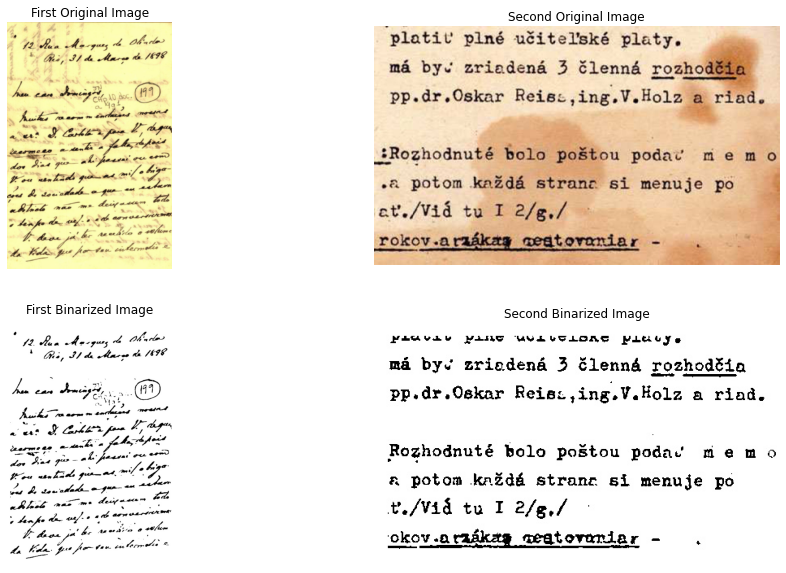

In [53]:
fig = plt.figure(figsize=(16,10))
rows = 2
columns = 2

fig.add_subplot(rows, columns, 1)
plt.imshow(originals[0])
plt.axis('off')
plt.title("First Original Image")

fig.add_subplot(rows, columns, 2)
plt.imshow(originals[1])
plt.axis('off')
plt.title("Second Original Image")

fig.add_subplot(rows, columns, 3)
plt.imshow(images[0])
plt.axis('off')
plt.title("First Binarized Image")

fig.add_subplot(rows, columns, 4)
plt.imshow(images[1])
plt.axis('off')
plt.title("Second Binarized Image");


<a id="kerasocr"></a>
# KERAS_OCR

In [54]:
pipline = keras_ocr.pipeline.Pipeline() #Creting a pipline 
kerasocr_preds = pipline.recognize(images)

Looking for /home/eya/.keras-ocr/craft_mlt_25k.h5
Looking for /home/eya/.keras-ocr/crnn_kurapan.h5
4/4 [==============================] - 11s 2s/step


### Keras-ocr plots boxes of detected text with annotations on the input image.

## Results of Keras-OCR

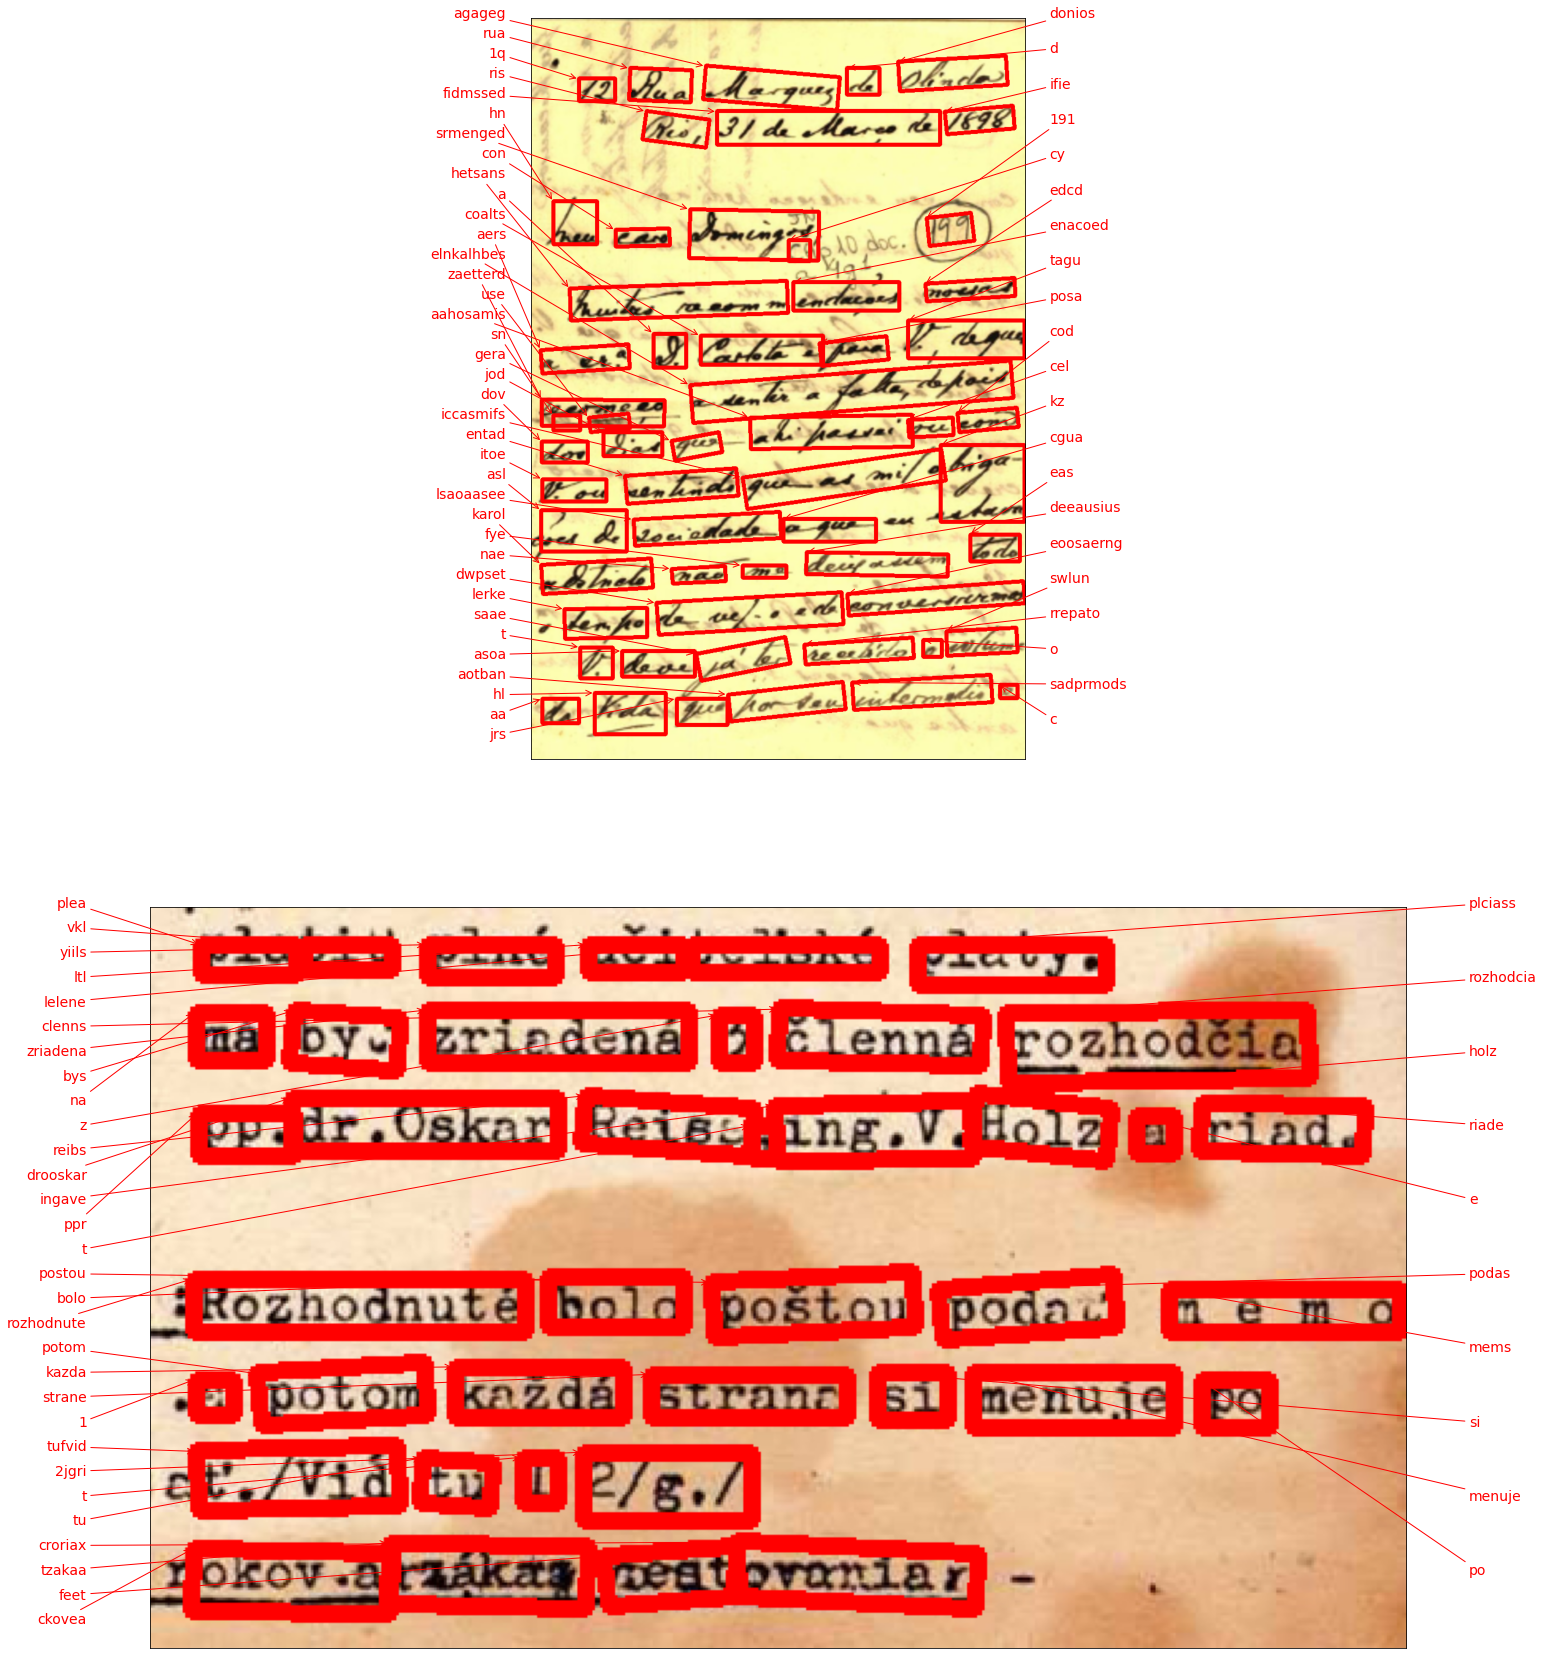

In [55]:
fig,axs = plt.subplots(nrows = 2 , figsize = (30,30))
for ax , image,  prediction in zip(axs , originals , kerasocr_preds):
    keras_ocr.tools.drawAnnotations(image, prediction, ax)

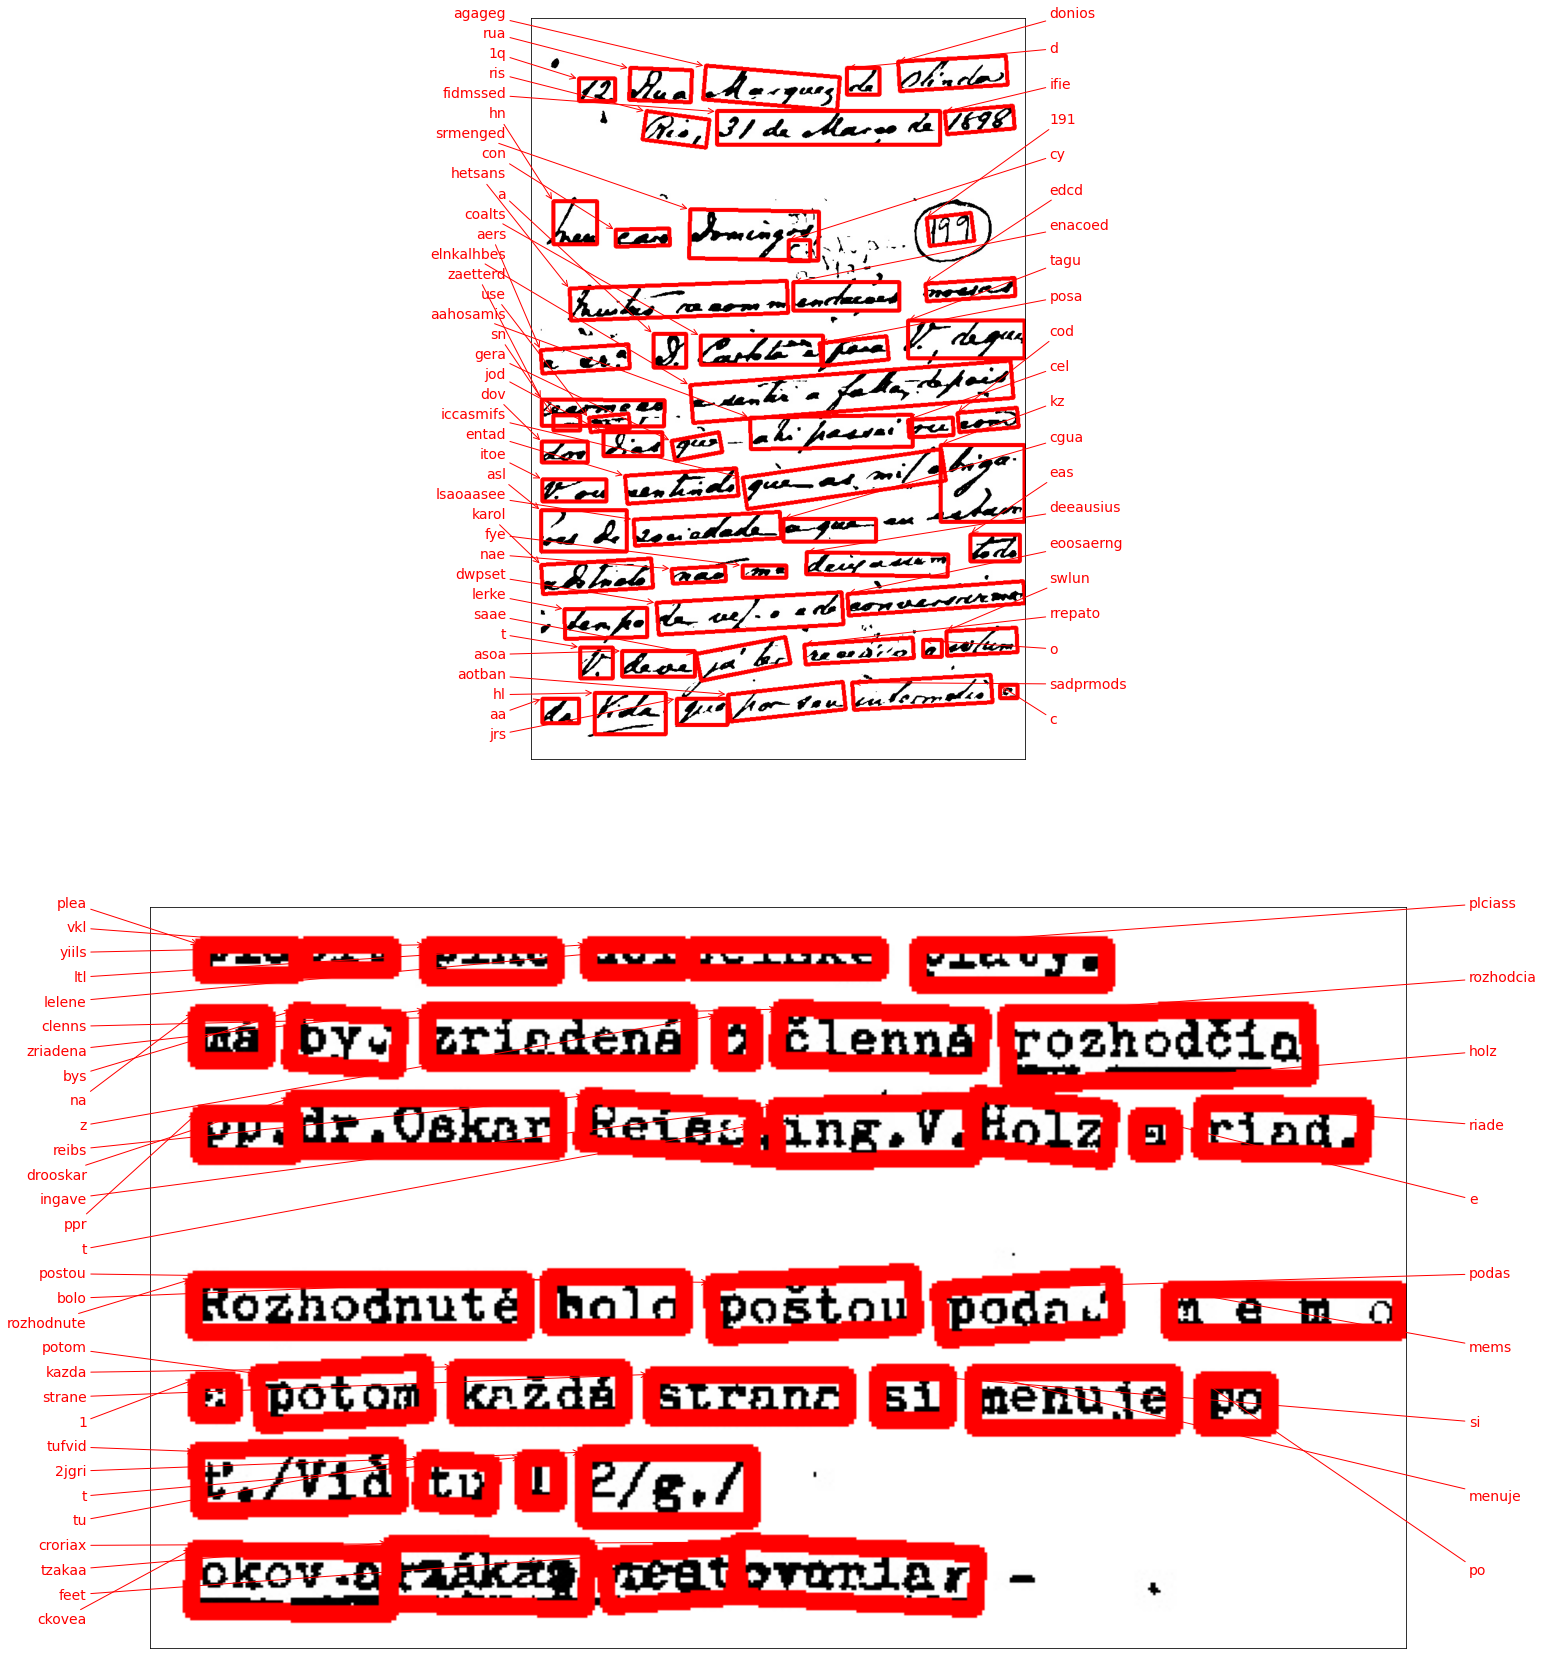

In [56]:
fig,axs = plt.subplots(nrows = 2 , figsize = (30,30))
for ax , image,  prediction in zip(axs , images , kerasocr_preds):
    keras_ocr.tools.drawAnnotations(image, prediction, ax)

<a id="easyocr"></a>
# EASYOCR

In [57]:
text_reader = easyocr.Reader(['en']) #Initialzing the ocr

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


## Results of EASY OCR

### First Image

Non Binarized :
4
12 #a Aarzes %
De4
3/
Aa ~ &/698
hau
Laua
A0 aoc .
119
1
a
2
hk `
{A7
I
4s
may
4
A
423
9 Eza
dy
k hf+
Ze4r22
a
0
hau
OU
2
dor
A:'
# 6
~hid
Kpa-
M
L
04
2
1o4
adb_a-ju
67
~Bzzb
Oae
A 0
dee~r
2 #
4 nuruktd
brh
k5
Mevbo
0
mfur
1 &
4
Kl % ho#6
Lu
lommsc
L
Iu
Xat
3r49
44-2
~2
pe
~/.
7e~
f' _

Binarized :
12
Ra -A-zes <
26
G:, 316 J> & /698
1_+7#
119
Rk; rrcte
044
~"&:
3 LkE~ f
dy
22787
ZE  hsey~
~7
Jor &
aL haut &
V & &
~Ez
7,
2 & Me"adb a]ea =
Z~
~Es ~w
deek ~
bacf &_ ~l::~
M38so
whcr
baat /' 6r
Js6 clms:
9
G
nl  for
Jrs
168 ~78[ ;
tertnt


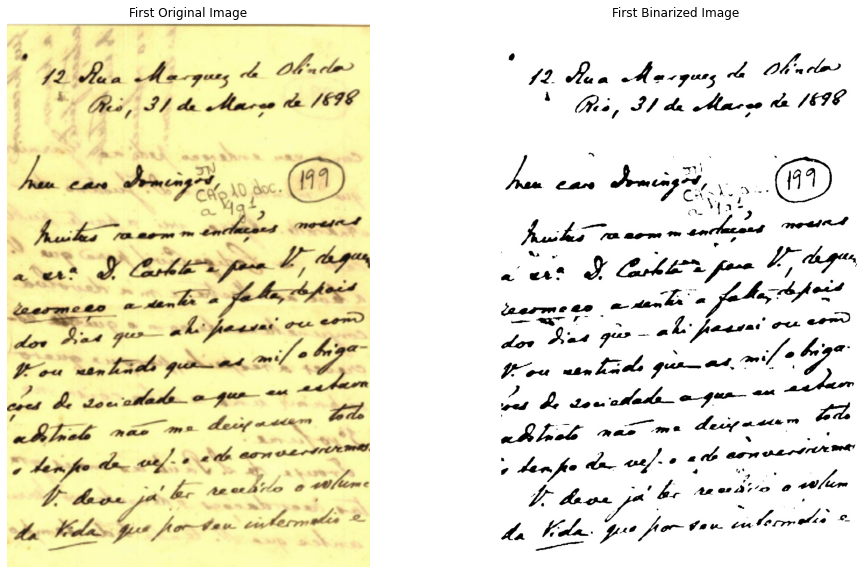

In [58]:
result1 = text_reader.readtext(originals[0] )
print("Non Binarized :")
for (bbox, text, prob) in result1:
    print(text)

result2 = text_reader.readtext(images[0] )
print("\nBinarized :")
for (bbox, text, prob) in result2:
    print( text)

fig = plt.figure(figsize=(16,10))
rows = 1
columns = 2

fig.add_subplot(rows, columns, 1)
plt.imshow(originals[0])
plt.axis('off')
plt.title("First Original Image")

fig.add_subplot(rows, columns, 2)
plt.imshow(images[0])
plt.axis('off')
plt.title("First Binarized Image");


### Second Image

Non Binarized :
platil plne
ucitelske platy.
ma by -
zriadena
3 #lenna rozhodeia
PP. dr.Oskar Reibz ,ing.V.Holz
riad.
Rozhodnute
bolo postou podae'
potom kazda
strant
si
menuje
po
ct'-/vid
tu
I 2/8./
rokov_ tziktt
ceatovniar

Binarized :
Pl40i
RLG
UVIOSIDIS
Kl4uj'
mi by- zriadena
3 #lenna rozhodeio
PP-dr. Oekar Reiez ,ing.V.Kolz
riod_
Rozhodnute
bolo pogtou podae'
m e m
potom knzda
stranc
6i
menuje
po
#./vid
tu
2/8./
'okov-! tzika:
neatorrde 


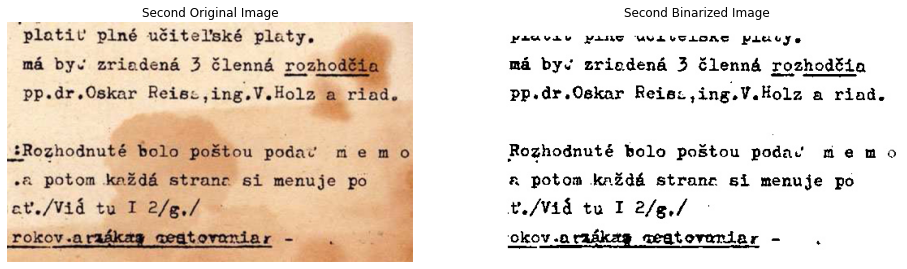

In [59]:
result3 = text_reader.readtext(originals[1] )
print("Non Binarized :")
for (bbox, text, prob) in result3:
    print(text)

result4 = text_reader.readtext(images[1] )
print("\nBinarized :")
for (bbox, text, prob) in result4:
    print( text)

fig = plt.figure(figsize=(16,10))
rows = 1
columns = 2

fig.add_subplot(rows, columns, 1)
plt.imshow(originals[1])
plt.axis('off')
plt.title("Second Original Image")

fig.add_subplot(rows, columns, 2)
plt.imshow(images[1])
plt.axis('off')
plt.title("Second Binarized Image");

<a id="pytesseract"></a>
# Pytesseract

In [60]:
tesseract_preds = []
for img in originals:
    tesseract_preds.append(pytesseract.image_to_string(img))
for img in images:
    tesseract_preds.append(pytesseract.image_to_string(img))    

##  Results of Pytesseract

### Image 1 

Jt An Hague Obnclo
*< Gea, IF de Marge le (098



(-0.5, 849.5, 1274.5, -0.5)

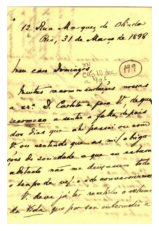

In [65]:
print(tesseract_preds[0])
plt.imshow(originals[0])
plt.axis('off')


oe
11, haa Aacgues Dhuclo

the Ving eelem
LD hoor br teed

‘ . Le la Faw Shemale
he biol or J



(-0.5, 849.5, 1274.5, -0.5)

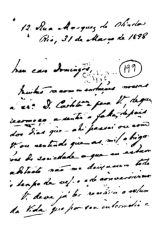

In [66]:
print(tesseract_preds[2])
plt.imshow(images[0])
plt.axis('off')


### Image 2

 

‘Platit plné uéitel’ské platy.
ma bys zriadené 3 élenné cel
pp.dr.Oskar Reine ‘tnG- 7 To a
:Roghodnuté bolo

ea potom kaZdé str:
at./Vid tu I 2/e/

  
 

ju podav memo
> si menuje po

¥

 
     



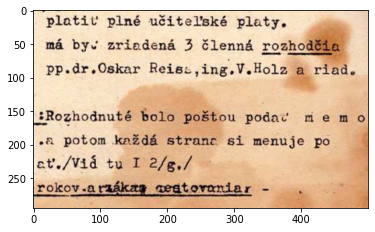

In [63]:
print(tesseract_preds[1])
plt.imshow(originals[1])

Nauvay YAne UVLUTLORS BLELys
ma by. griadend 3 Elennd rozhodéia
pp.dr,Oskar Reis: ,ing.V.Holz a riad.

Roghodnuté bolo poStou poda’ me mo
® potom kaZdé stranz si menuje po
v./Vid tu I 2/g./

‘okov.oraakag aeatoverniar -  .



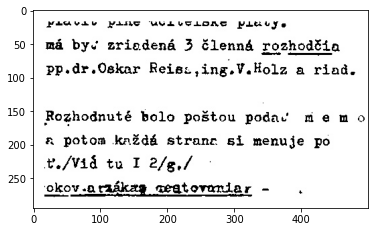

In [64]:
print(tesseract_preds[3])
plt.imshow(images[1])

<a id="conclusions"></a>
# CONCLUSIONS

### * Keras-OCR is image specific OCR tool. If text is inside the image and their fonts and colors are unorganized, Keras-ocr consumes time if used on CPU
### * EasyOCR is lightweight model which is giving a good performance for receipt or PDF conversion. It is giving more accurate results with organized texts like pdf files, receipts, bills. EasyOCR also performs well on noisy images
### * Pytesseract is performing well for high-resolution images. Certain morphological operations such as dilation, erosion, OTSU/etc.. binarization can help increase pytesseract performance. It also provides better results on handwritten text as compared to EasyOCR